# Finish Line Review Analysis

In [1]:
import pandas as pd 
import numpy as np
import re

import datetime

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# read in top men shoes reviews

In [2]:
men_ultra = pd.read_csv("men_adidas_ultraboost_review.csv", header = None)
men_superstar = pd.read_csv("men_adidas_superstar_review.csv", header = None)
men_airforce = pd.read_csv("men_nike_airforce_review.csv", header = None)
men_roshe = pd.read_csv("men_nike_roshe_review.csv", header = None)
men_mariah = pd.read_csv("men_nike_mariah_review.csv", header = None)

top_men = [men_ultra, men_superstar, men_airforce, men_roshe, men_mariah]

men_select_col = [x.loc[:,(0,9,10,11,15)] for x in top_men]

for i in range(5):
    men_select_col[i].columns = ['shoes', 'title', 'user', "text", "date"]   # add col names
    men_select_col[i]['date_mon'] = sorted(pd.to_datetime(men_select_col[i]['date']).dt.to_period('M')) 
                                # note sorted here is used for ploting purpose. 
                                # sorting this column will make the 'date_mon' column out of order
                                # even though it is out of order, this is ok for the later on plot becasue only count
                                # plot was used. If a sum plot is used, this out of orderness would be a problem.
    
men_ultra_df = men_select_col[0]
men_superstar_df = men_select_col[1]
men_airforce_df = men_select_col[2]
men_roshe_df = men_select_col[3]
men_mariah_df = men_select_col[4]


# read in women shoes reviews

In [3]:
women_ultra = pd.read_csv("women_adidas_ultraboost_review.csv", header = None)
women_superstar = pd.read_csv("women_adidas_superstar_review.csv", header = None)
women_huarache = pd.read_csv("women_nike_huarache_review.csv", header = None)
women_roshe = pd.read_csv("women_nike_roshe_review.csv", header = None)
women_flyknit = pd.read_csv("women_nike_flyknit_review.csv", header = None)

women = [women_ultra, women_superstar, women_huarache, women_roshe, women_flyknit]

women_select_col = [x.loc[:,(0,2,3,4,8)] for x in women]
for i in range(5):
    women_select_col[i].columns = ['shoes','title', 'user', "text", "date"]  # add col names
    women_select_col[i]['date_mon'] = sorted(pd.to_datetime(women_select_col[i]['date']).dt.to_period('M'))

women_ultra_df = women_select_col[0]
women_superstar_df = women_select_col[1]
women_huarache_df = women_select_col[2]
women_roshe_df = women_select_col[3]
women_flyknit_df = women_select_col[4]


# word cloud analysis preprocessing

In [4]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kellyho/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/kellyho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# df with reviews from all shoes to do preprocessing all together
df= pd.concat([men_ultra_df, men_superstar_df, men_airforce_df, men_roshe_df, men_mariah_df,\
                         women_ultra_df, women_superstar_df, women_huarache_df, women_roshe_df, women_flyknit_df])
len(df)

8685

In [6]:
# concatenate the text with its title
df['text'] = df['title'] + ' ' + df['text']

In [7]:
# Fill na with empty string
df['text'] = df['text'].fillna('')

In [8]:
# Convert all the string to lower cases
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Replace all empty spaces with just one
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))

# Remove all the empty text from the dataframe
df = df.loc[df['text'] != ""]

In [9]:
# 
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]','', x))

In [10]:
# Filtering words out that do not provide additional insight
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in\
                                                 [stop, 'shoe', 'shoes', 'im', 'feet', 'pair', 'got',\
                                                  'bought', 'dont', 'adida', 'adidas', 'review', 'came',\
                                                  'sneakers', 'nike', 'wear', 'collected', 'part', 'theyre',\
                                                  'really', 'foot']))

len(df)

7598

# word cloud analysis

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
m_ultra = df[df['shoes'].str.contains(r"^(?=^MEN'S)(?=.*ULTRABOOST)")]
m_super = df[df['shoes'].str.contains(r"^(?=^MEN'S)(?=.*SUPERSTAR)")] 
m_airforce = df[df['shoes'].str.contains(r"^(?=^MEN'S)(?=.*FORCE)")] 
m_roshe = df[df['shoes'].str.contains(r"^(?=^MEN'S)(?=.*ROSHE)")] 
m_mar = df[df['shoes'].str.contains(r"^(?=^MEN'S)(?=.*MARIAH)")] # low rating

w_ultra= df[df['shoes'].str.contains(r"^(?=^WOMEN'S)(?=.*ULTRABOOST)")] 
w_super = df[df['shoes'].str.contains(r"^(?=^WOMEN'S)(?=.*SUPERSTAR)")] 
w_huar = df[df['shoes'].str.contains(r"^(?=^WOMEN'S)(?=.*HUAR)")] 
w_roshe = df[df['shoes'].str.contains(r"^(?=^WOMEN'S)(?=.*ROSHE)")] 
w_flyknit = df[df['shoes'].str.contains(r"^(?=^WOMEN'S)(?=.*FLYKNIT)")] # low rating

word_cloud_df = [m_ultra, m_super, m_airforce, m_roshe, m_mar, w_ultra, w_super, w_huar, w_roshe, w_flyknit]


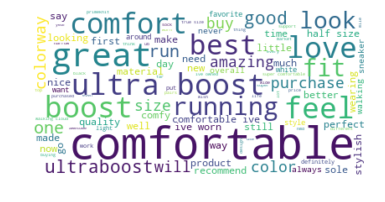

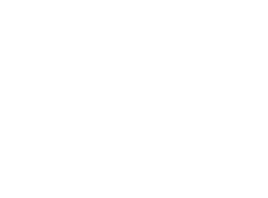

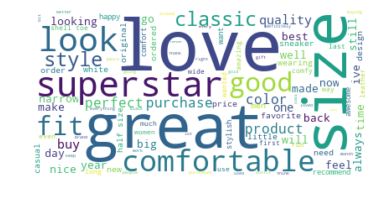

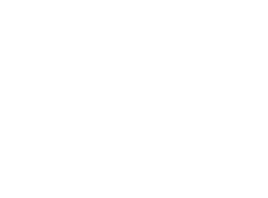

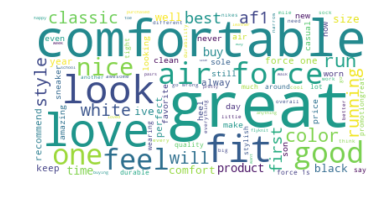

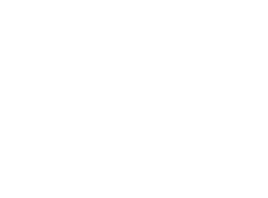

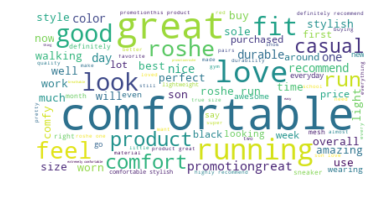

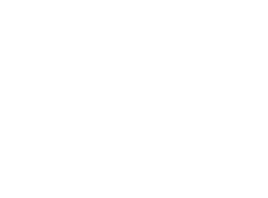

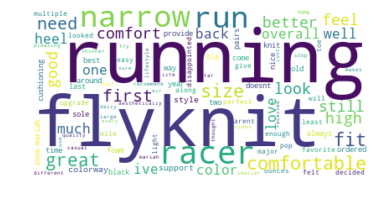

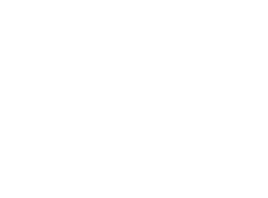

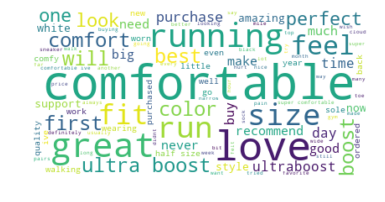

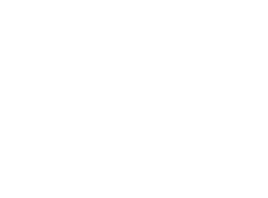

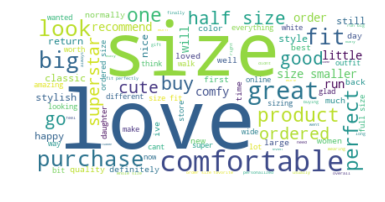

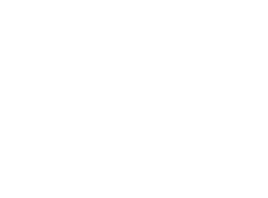

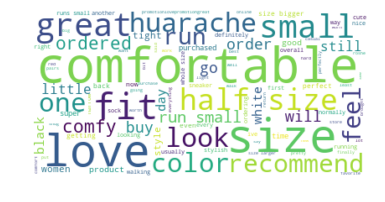

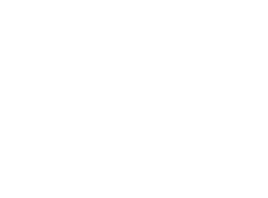

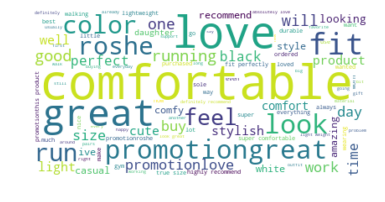

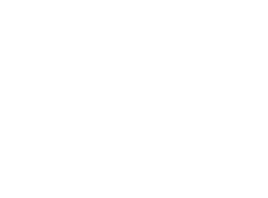

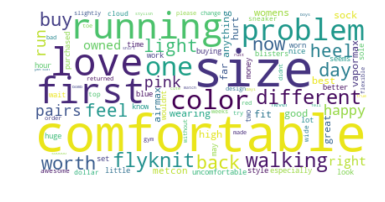

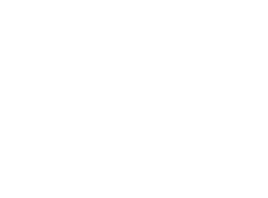

In [13]:
wc = WordCloud(background_color="white", max_words=100)
for i in range(10):
    wc.generate(''.join(word_cloud_df[i]['text'])) # generate word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure(figsize=(4, 3))
    plt.axis("off")
    plt.show()

# Purchasing trends for Adidas top selling shoes

Text(0.5,1,'Men ultraBOOST')

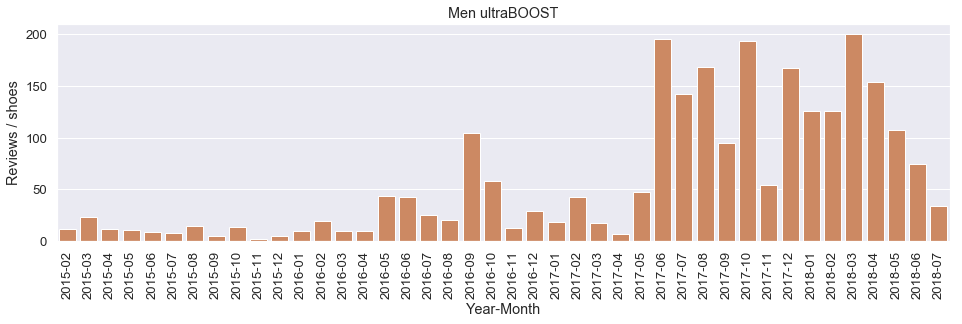

In [24]:
sns.set(font_scale = 1.2)  # this will set the font scale for all plots
# men adidas ultraBOOST purchasing trend 
sns.countplot(x='date_mon', data=men_ultra_df, color="#dd8452")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=16,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Men ultraBOOST')

Text(0.5,1,'Men Superstar')

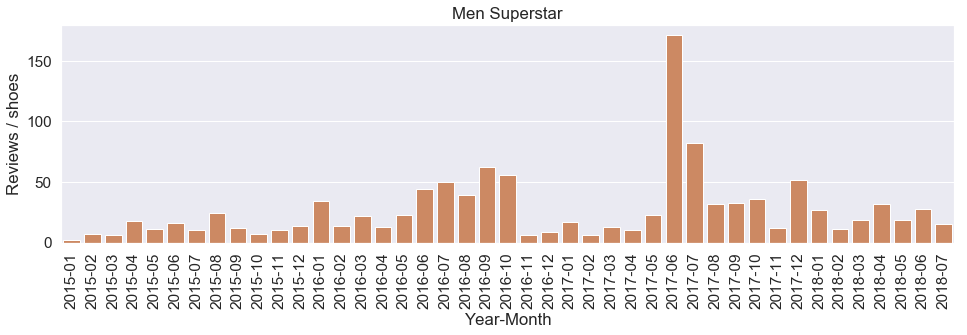

In [15]:
sns.set(font_scale = 1.4)

# men adidas superstar purchasing trend 
sns.countplot(x='date_mon', data=men_superstar_df, color="#dd8452")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=16,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Men Superstar')

Text(0.5,1,'Women ultraBOOST')

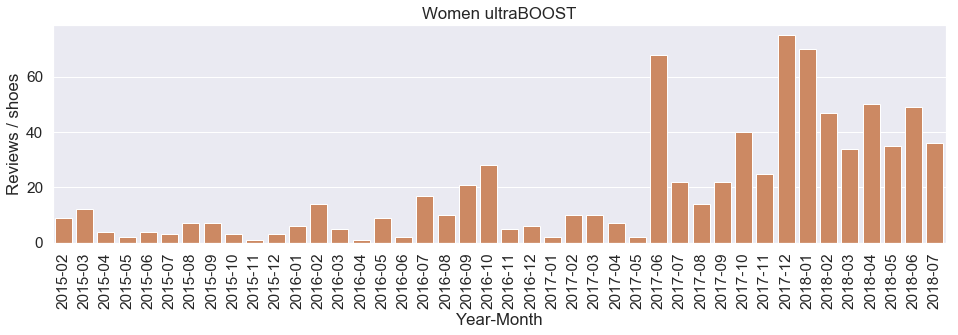

In [16]:
# women adidas ultraBOOST purchasing trend 
sns.countplot(x='date_mon', data=women_ultra_df, color="#dd8452")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=12,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Women ultraBOOST')

Text(0.5,1,'Women Superstar')

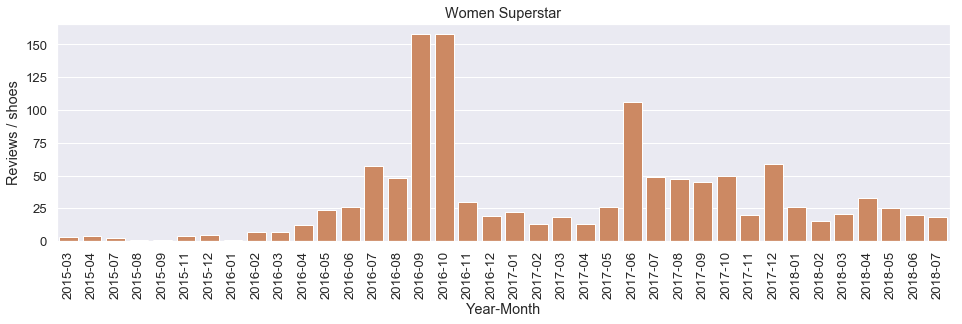

In [25]:
# women adidas superstar purchasing trend 
sns.countplot(x='date_mon', data=women_superstar_df, color="#dd8452")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=16,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Women Superstar')

# Purchasing trends for Nike top selling shoes

In [18]:
# purchasing trend for Nike 
# creat df with reviews that were written during promotion period
ad_m_roshe = men_roshe_df[men_roshe_df['text'].str.contains\
                             ("This review was collected as part of a promotion")]
ad_m_airforce = men_airforce_df[men_airforce_df['text'].str.contains\
                             ("This review was collected as part of a promotion")]
ad_m_mar = men_mariah_df[men_mariah_df['text'].str.contains\
                             ("This review was collected as part of a promotion")]
ad_wo_roshe = women_roshe_df[women_roshe_df['text'].str.contains\
                             ("This review was collected as part of a promotion")]
ad_wo_huarache =women_huarache_df[women_huarache_df['text'].str.contains\
                                  ("This review was collected as part of a promotion")]

# pick men nike roshe to display for graph
ad_m_roshe.loc[:,'promotion'] = 'yes'
men_roshe_df.loc[:,'promotion'] = 'total'
roshe = pd.concat([ad_m_roshe, men_roshe_df])

# pick women nike haurache to display for graph
ad_wo_huarache.loc[:,'promotion'] = 'yes'
women_huarache_df.loc[:,'promotion'] = 'total'
huarache = pd.concat([ad_wo_huarache, women_huarache_df])


Text(0.5,1,'Men Roshe')

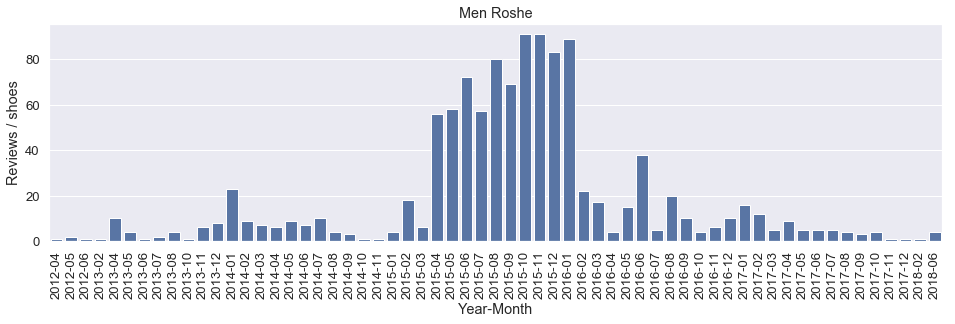

In [19]:
sns.set(font_scale = 1.2)

# men nike roshe purchasing trend (total reviews)
sns.countplot(x='date_mon', data=men_roshe_df, color="#4c72b0")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=20,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Men Roshe')


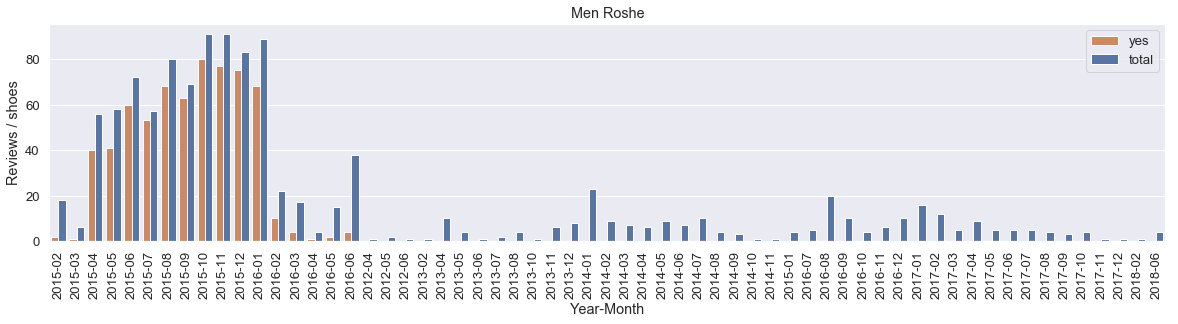

In [20]:
sns.set(font_scale = 1.2)

# men nike roshe purchasing trend (total reviews vs promotion reviews)
sns.countplot(x='date_mon', data=roshe, hue="promotion", palette = sns.color_palette(["#dd8452","#4c72b0"]))
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=20,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Men Roshe')
plt.legend(loc='upper right')

Text(0.5,1,'Women Huarache')

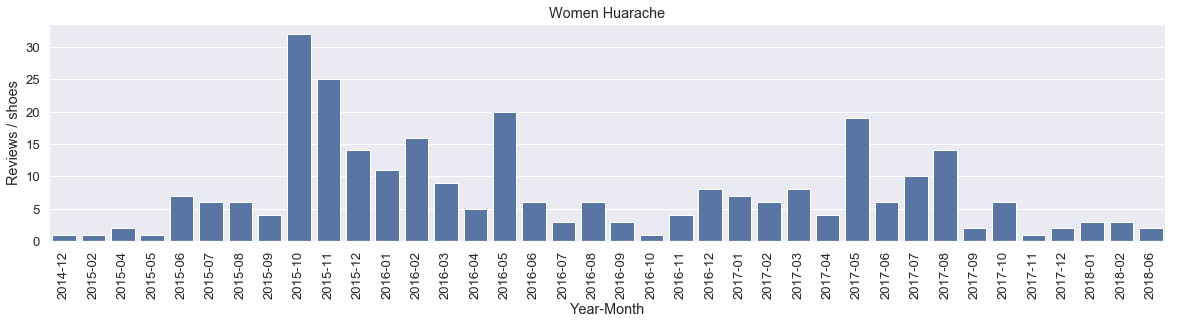

In [21]:
# women nike haurache purchasing trend (total reviews)
sns.countplot(x='date_mon', data=women_huarache_df, color="#4c72b0")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=24,4
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Women Huarache')

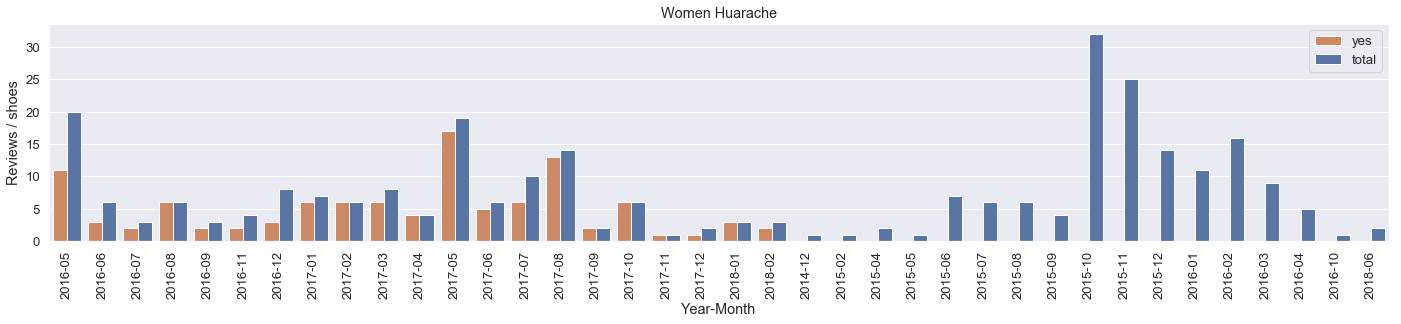

In [22]:
# women nike huarache purchasing trend (total reviews vs promotion reviews)

sns.countplot(x='date_mon', data=huarache, hue="promotion", palette = sns.color_palette(["#dd8452","#4c72b0"]))
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=12,2
plt.xlabel('Year-Month')
plt.ylabel('Reviews / shoes')
plt.title('Women Huarache')
plt.legend(loc='upper right')